<h1><center>Chapter03. 데이터 마트</center></h1>

<h1><center>제 2절. 데이터 가공</center></h1>

## 1. Data Exploration

데이터 분석을 위해서 **head(), summary()** 명령어로 데이터의 상태를 파악해야 한다.

1. 수치형 변수 : 최대값, 최소값, 평균 등
2. 명목형 면주 : 명목값, 데이터 개수

In [2]:
# Diamond Data
# head()를 통해 상위 5개의 데이터를 출력
require(ggplot2)
data(diamonds)
dia.data <- diamonds
head(dia.data)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [3]:
# 데이터 분포 파악
# 수치 변수별 최소값, 1사분위수, 중앙값, 평균, 3사반위수, 최대값
# 명목 변수별 데이터 값의 개수 카운드
summary(dia.data)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

## 2. 변수 중요도

변수 선택법과 유사한 개념으로 **klaR 패키지**를 사용한다. 변수에 따라 어떻게 분류되는지 에러율과 결과를 그래프로 출력한다.
- `Wilk's Lambda` : 집단내분산 / 총분산, 종속변수에 미치는 영향력에 따라 변수의 중요도를 정리
- `greedy.wilks()` : Wilk's Lambda 값을 기준으로 단계적으로 전진 변수/모델 선택을 수행
- `plineplot()` : Wilk's Lambda값을 반환하며 작을 수록 설명력이 좋음 
- `Categorial Variable` : 이산형, 범주형 변수로 명목변수와 순위변수로 나뉨

### Wilks.lambda
각각의 기능이 각각의 데이터를 얼마나 잘 분류하는지 보여주는 척도이다. 그룹간의 차이로 설명되지 않는 차별적 점수의 총 분산 비율과 동일합니다. 값이 작을 수록 차별성이 더 커짐을 의미한다.

![img](http://www.statisticshowto.com/wp-content/uploads/2015/03/wilks-lambda-300x68.png)
- form : https://goo.gl/KeMsoL

In [45]:
# greedy.wiks 예제
library("klaR")
# greedy.wilks(formula, data = NULL, ...)
iris.result <- greedy.wilks(Species~., data=iris, niveau=0.1)

In [44]:
# 결과값을 보니 Petal.Width, Sepal.Length가 제일 유용
iris.result$results

vars,Wilks.lambda,F.statistics.overall,p.value.overall,F.statistics.diff,p.value.diff
Petal.Length,0.05862828,1180.1612,2.856777e-91,1180.161182,2.856777e-91
Sepal.Width,0.03688411,307.1047,2.848870e-103,43.035453,1.998401e-15
Petal.Width,0.02497554,257.5032,5.036981e-113,34.568686,5.122569e-13
Sepal.Length,0.02343863,199.1453,1.365006e-112,4.721152,1.031871e-02


In [50]:
# 결과값을 변수로 담아 Wilks.lambda 만 출력.
iris.step$results$Wilks.lambda

[1] 0.05862828 0.03688411 0.02497554 0.02343863

In [70]:
# iris2 데이터셋 생성
iris2 <- iris[, c(1,3,5)]  # Sepal.Length, Petal.Length, Species
head(iris2)

Sepal.Length,Petal.Length,Species
5.1,1.4,setosa
4.9,1.4,setosa
4.7,1.3,setosa
4.6,1.5,setosa
5.0,1.4,setosa
5.4,1.7,setosa


[1] 0.03333333

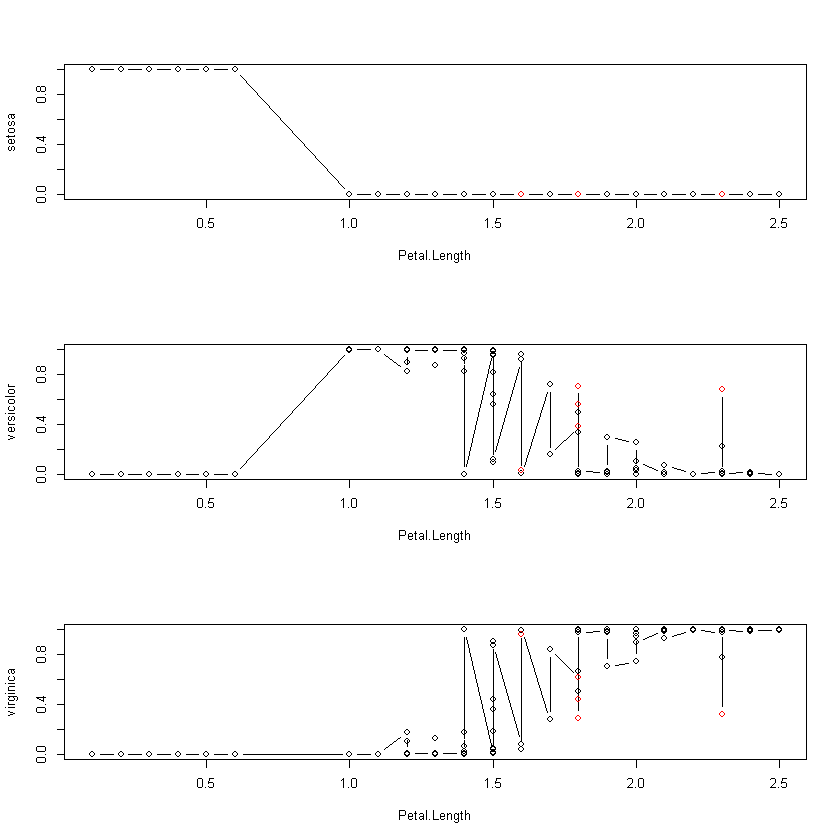

In [95]:
# Petal.Length로 plineplot 그래프 출력
# plineplot(formula, data, method, x, col.wrong = "red", ylim = c(0, 1), loo = FALSE, mfrow, ...)
# lda는 잠재 다래클래 할당
plineplot(Species ~. , data=iris2, method="lda", x=iris[,4], xlab="Petal.Length")

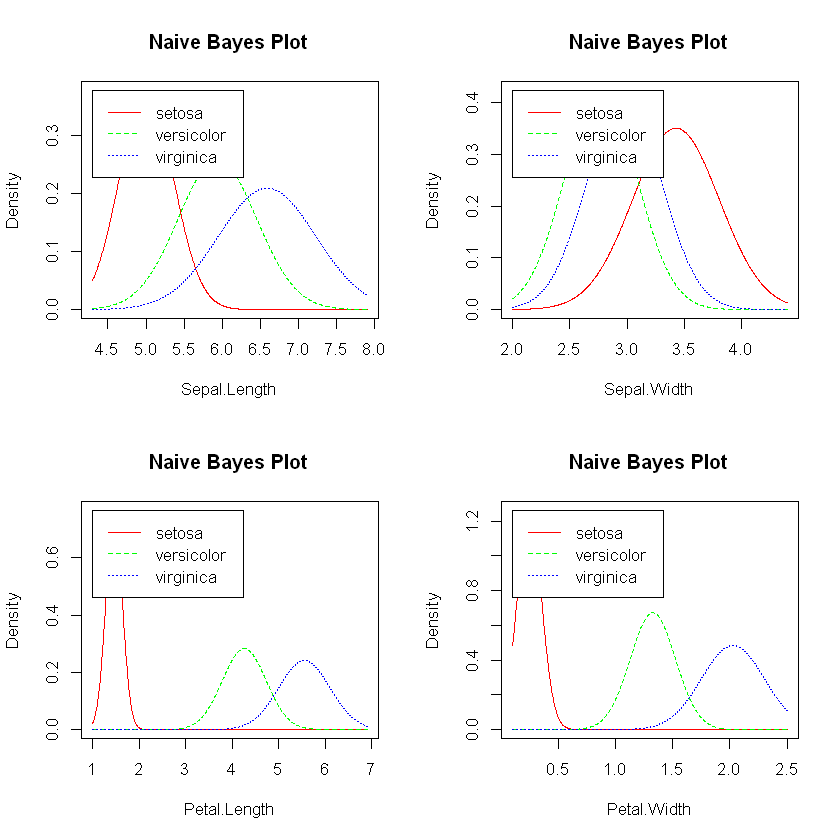

In [122]:
# Petal Length에 따라 Species가 잘 구분된다. 
# 변수를 그룹핑해서 Cetegorial Variable(범주형 변수)로 활용 : 0~0.5, 0.5~1.5, ...
# 베이즈정리에 따라 각 독립변수별로 나눔
# Species 변수의 범주에 따라 조건부 사후 확률을 계싼
mN <- NaiveBayes(Species~., data=iris)
par(mfrow=c(2,2))
plot(mN)

## 3. 변수의 구간화

신용평가모델, 고객 세분화 등 시스템으로 모형을 적용하기 위해서는 각 변수의 구간화 작업이 필요하다.
1. **binning** : [Continuous 연속형] 변수를 [Categorial 범주형]으로 변환. 등간격으로 50개 이하로 나누어 각 구간을 병합하면서 줄여나가는 방식
1. **의사결정나무** : 세분화 또는 예ㄱ에 활용되는 의사결정나무 모형을 활용

----